## SC1015 Mini-Project 
Tutorial no.- BCF1 

Codes by - Anoushka, Dominick, Yojin


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Libraries for Logistic regression and Decision tree 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
# importing the train dataset of Loan Prediction Analysis 
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Finding median of the numerical variables in train set
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Median value of categorical variables in train test
print(train['Gender'].value_counts())
print(train['Married'].value_counts())
print(train['Dependents'].value_counts())
print(train['Self_Employed'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64


## Cleaning of the train datasets 
Replacing null cells with the medians of the variables

In [6]:
## Train Set 
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Replacing with median
train['Gender'].fillna(value='Male', inplace=True)
train['Married'].fillna(value='Yes', inplace=True)
train['Dependents'].fillna(value='0', inplace=True)
train['Self_Employed'].fillna(value='No', inplace=True)
train['LoanAmount'].fillna(value='128', inplace=True)
train['Loan_Amount_Term'].fillna(value=360, inplace=True)
train['Credit_History'].fillna(value=1, inplace=True)

In [8]:
# Null sets removed
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Exploratory Data Analysis 
Comparing the variables of train data set and analysing them 

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

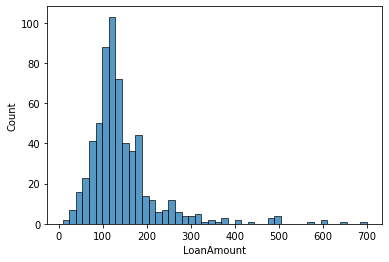

In [9]:
train['LoanAmount']=train['LoanAmount'].astype('int64')
sb.histplot(data = train['LoanAmount'])

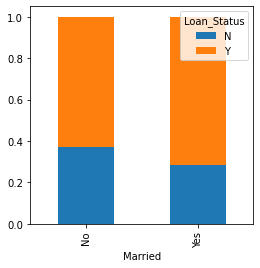

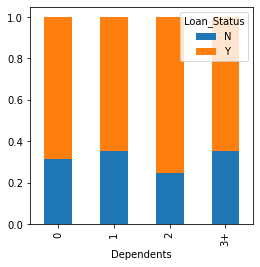

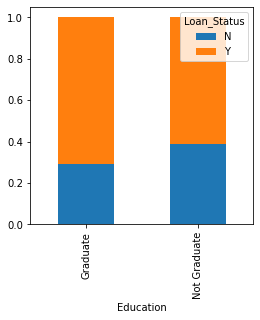

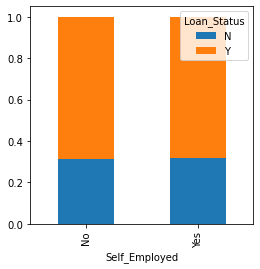

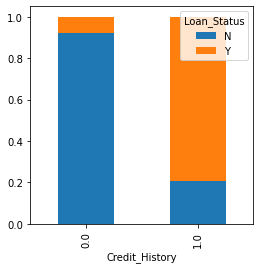

In [10]:
# Graphs representing Loan_Status with different categorical variables
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True,figsize = (4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True,figsize = (4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True,figsize = (4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True,figsize = (4,4))
plt.show()
Credit_History.div(Credit_History.sum(1).astype(float), axis = 0).plot(kind = "bar",stacked = True,figsize = (4,4))
plt.show()


<AxesSubplot:>

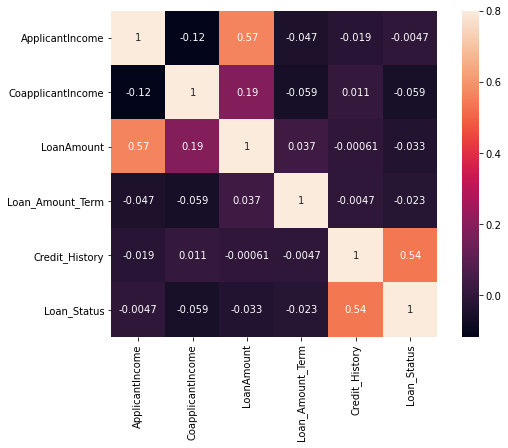

In [11]:
# Correlation of a few variables 
traincopy=train.copy()
traincopy['Loan_Status'].replace('N', 0,inplace=True)
traincopy['Loan_Status'].replace('Y', 1,inplace=True)
traincopy['Loan_Status'].astype('int64')
mat = traincopy.corr()
f, ax = plt.subplots(figsize = (9,6))
sb.heatmap(mat,vmax = .8,square = True, annot = True)

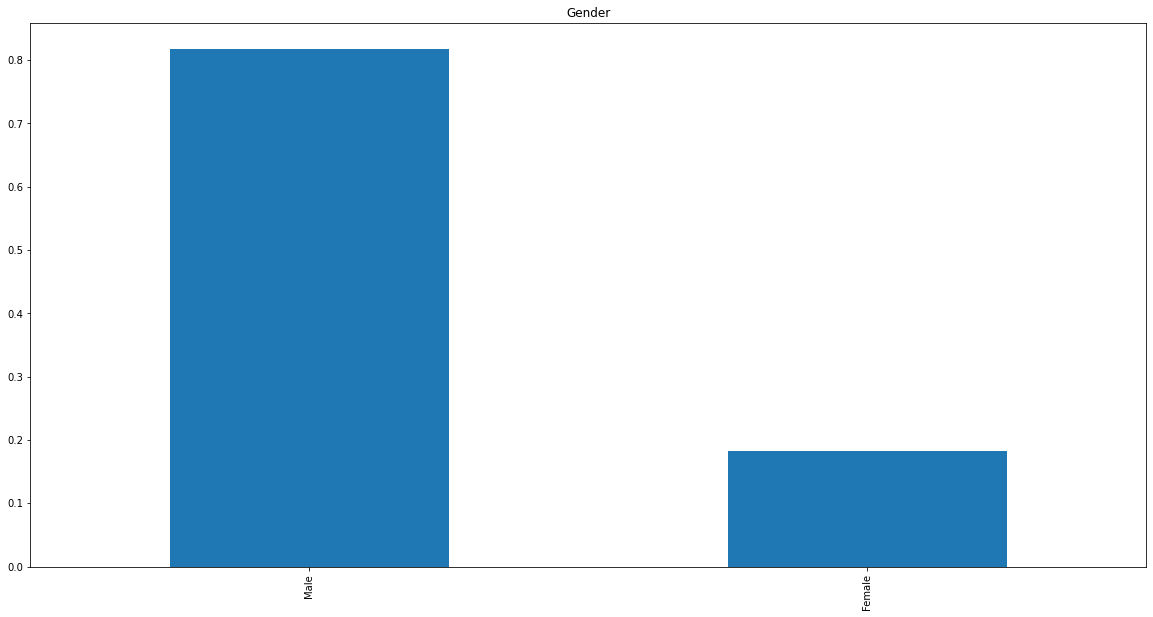

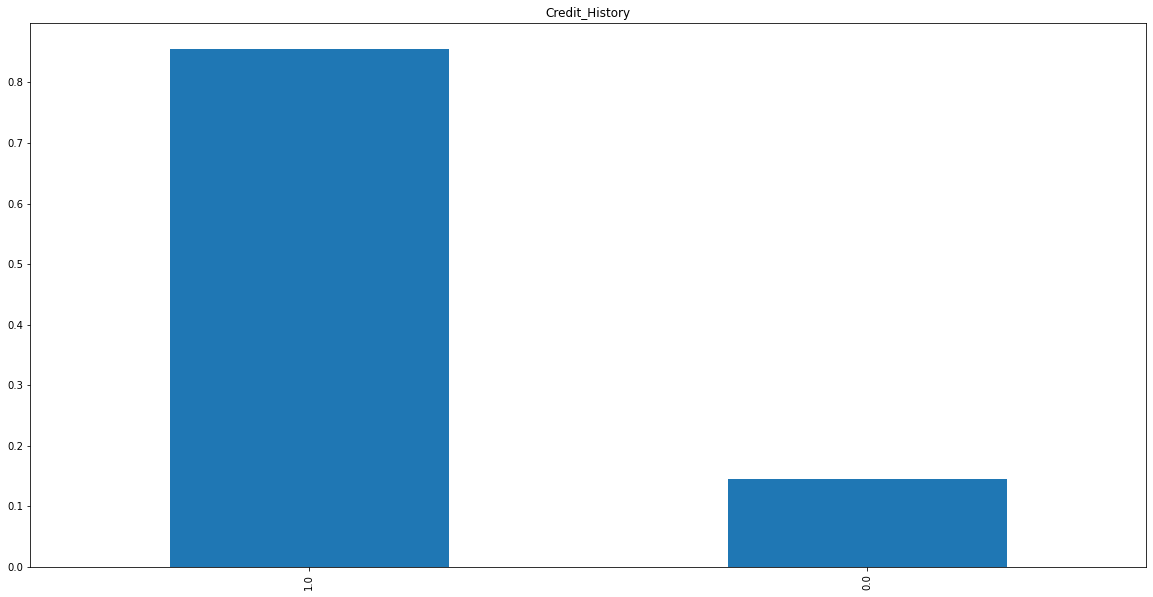

In [12]:
# Comparing the components of the variables 
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Gender')
plt.show()
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Credit_History')
plt.show()


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Loan_Status'>

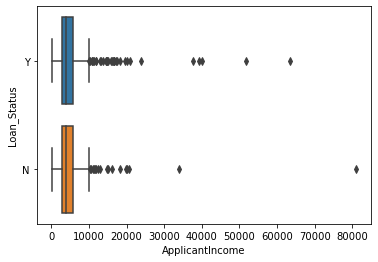

In [13]:
#Boxplot of ApplicantIncome and Loan_Status
sb.boxplot(x = 'ApplicantIncome', y = 'Loan_Status', data = train)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Loan_Status'>

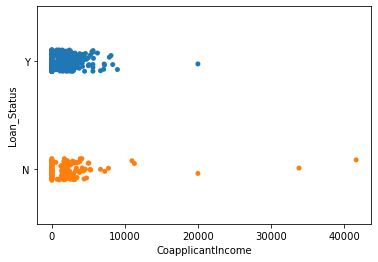

In [14]:
#Stripplot of CoapplicantIncome and Loan_Status
sb.stripplot(x = 'CoapplicantIncome', y = 'Loan_Status', data = train)

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Loan_Status'>

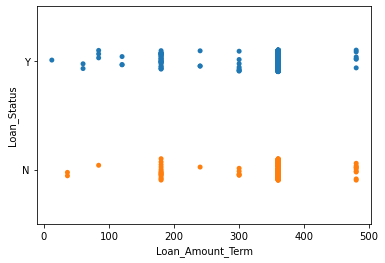

In [15]:
#Stripplot of Loan_Amount_Term and Loan_Status
sb.stripplot(x = 'Loan_Amount_Term', y = 'Loan_Status', data = train)

## Logistic Regression (Method-1)
To predict the Loan_Status with the help of logistic regression

In [16]:
# assigning a name to the Logistic Regression function
model = LogisticRegression(max_iter = 1000)

In [17]:
# Dropping Loan_ID as it does not affect Loan_Status
new_train = train.drop('Loan_ID', axis = 1)


In [18]:
# Targeted variable to be in a seperate dataset
# Therefore, dropping Loan_Status from Training set and keeping it in Test Set
x = train.drop('Loan_Status', 1)
y = train.Loan_Status

In [19]:
# Dummies in train and test set will convert the categorical variables into binary values 
x = pd.get_dummies(x)
a = pd.get_dummies(new_train)

In [20]:
# Train_Test_Split (The same will be used for Decision Tree (Method-2))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [21]:
# Fit The Logistics Regression model
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [22]:
# Predict Loan_Status and compare it with Test set to find its accuracy
pred_test = model.predict(x_test)
accuracy_score(y_test, pred_test)


0.7621621621621621

In [23]:
# Predict Response corresponding to Predictors
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [24]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train,pred_train))


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8484848484848485


In [25]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test,pred_test))

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7621621621621621


<AxesSubplot:>

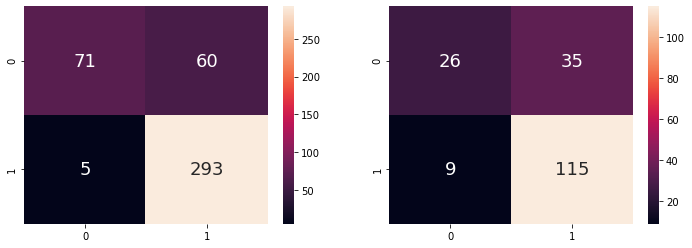

In [26]:
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, pred_train),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, pred_test), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

## Decision Tree (Method-2)
To predict the Loan_Status with the help of decision tree 

In [27]:
# using the same teran test split so that the answer and accuracy that not vary. 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [28]:
# Decision Tree using Train and Test data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(x_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=4)

In [29]:
# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(x_train)
y_test_pred = dectree.predict(x_test)

In [30]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(x_train, y_train))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8414918414918415



In [31]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(x_test, y_test))
print()

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.7675675675675676



<AxesSubplot:>

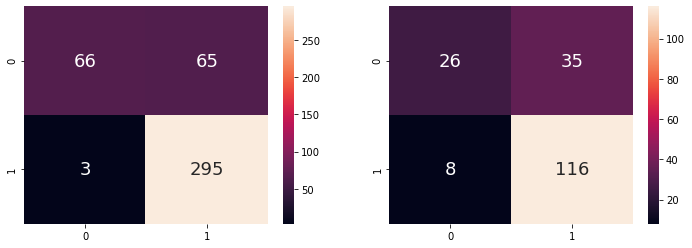

In [32]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(1271.9117647058824, 2446.2, 'Credit_History <= 0.5\ngini = 0.424\nsamples = 429\nvalue = [131, 298]\nclass = Y'),
 Text(656.4705882352941, 1902.6, 'Loan_ID_LP001677 <= 0.5\ngini = 0.121\nsamples = 62\nvalue = [58, 4]\nclass = N'),
 Text(492.3529411764706, 1359.0, 'LoanAmount <= 547.5\ngini = 0.094\nsamples = 61\nvalue = [58, 3]\nclass = N'),
 Text(328.2352941176471, 815.3999999999999, 'Loan_ID_LP001882 <= 0.5\ngini = 0.064\nsamples = 60\nvalue = [58, 2]\nclass = N'),
 Text(164.11764705882354, 271.7999999999997, 'gini = 0.033\nsamples = 59\nvalue = [58, 1]\nclass = N'),
 Text(492.3529411764706, 271.7999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(656.4705882352941, 815.3999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(820.5882352941177, 1359.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Y'),
 Text(1887.3529411764707, 1902.6, 'Married_No <= 0.5\ngini = 0.319\nsamples = 367\nvalue = [73, 294]\nclass = Y'),
 Text(1312.941176

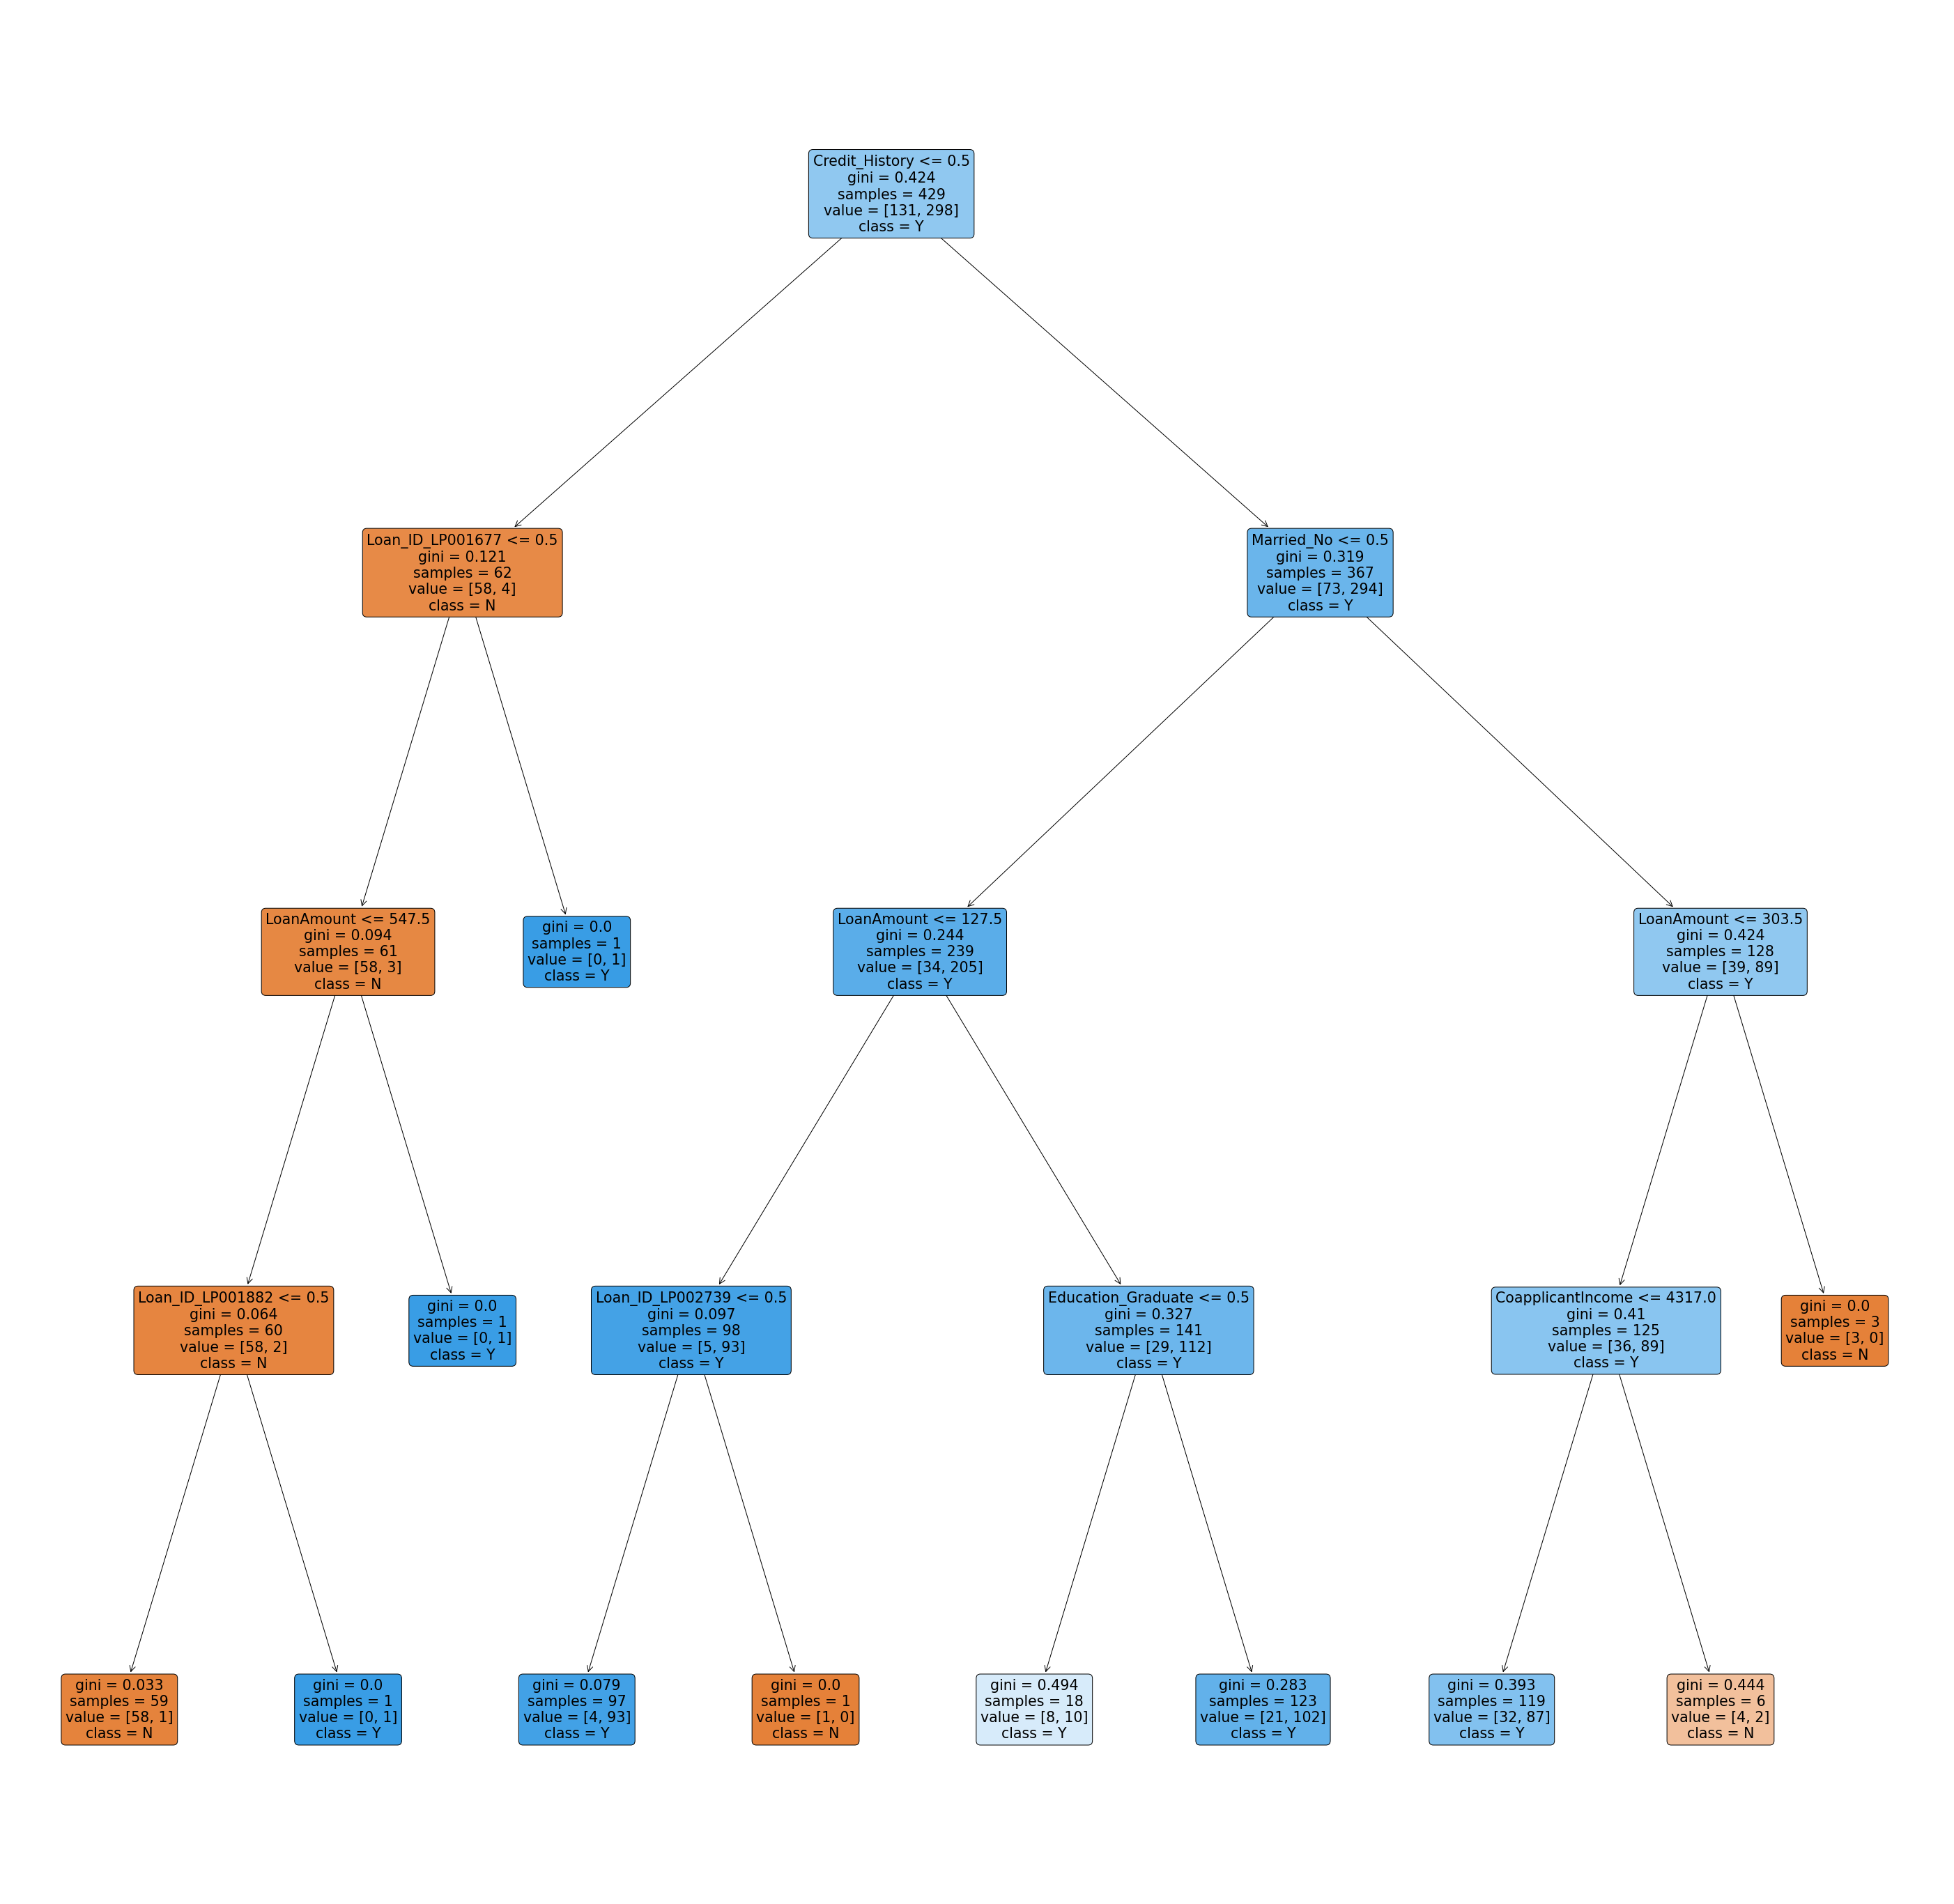

In [33]:
f = plt.figure(figsize = (50,50))
plot_tree(dectree, filled = True, rounded = True, feature_names = x_train.columns, class_names = ["N","Y"])